In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

In [24]:
data = pd.read_csv("../data/ihme_data.csv")

In [25]:
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code.upper()).alpha_3
    except:
        return None

data['iso3'] = data['country'].apply(iso2_to_iso3)
# Drop rows with invalid ISO2 codes
#data = data.dropna(subset=['iso3'])

In [26]:
shapefilepath = "../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefilepath)

In [27]:
# Function to map country names to ISO3 codes
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Apply it to the ADMIN column
world['ISO_A3_fixed'] = world['ADMIN'].apply(get_iso3)

# Use the fixed ISO3 column only where original ISO_A3 is -99 or missing
world['ISO_A3'] = world.apply(
    lambda row: row['ISO_A3_fixed'] if row['ISO_A3'] in [None, '-99'] else row['ISO_A3'],
    axis=1
)

# Drop the helper column
world.drop(columns='ISO_A3_fixed', inplace=True)

In [28]:
merged = world.merge(data, how="left", left_on="ISO_A3", right_on="iso3")

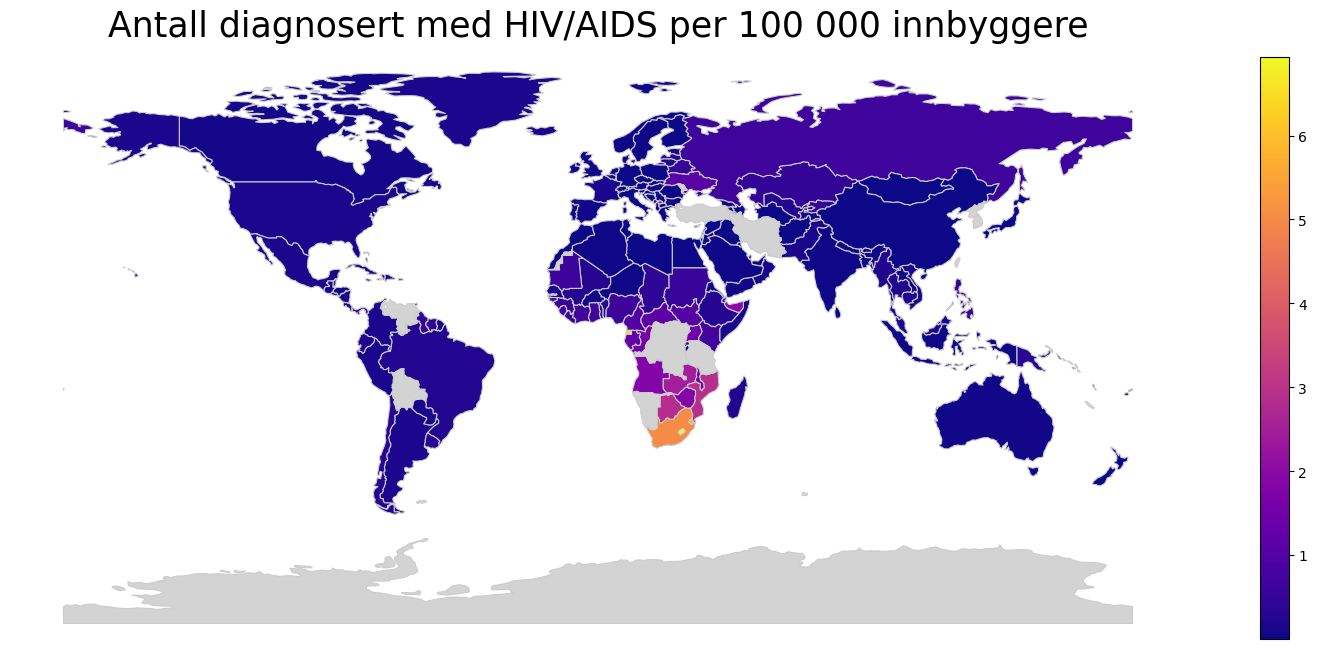

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='hiv',
            cmap='plasma',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend_kwds = {
                "shrink": 0.6,
            },
            legend=True,
            missing_kwds={
                "color": "lightgrey",
                "label": "No data"
            })

ax.set_title("Antall diagnosert med HIV/AIDS per 100 000 innbyggere", fontsize=25)
ax.axis("off")
plt.tight_layout()
plt.show()